# Build Machine Learning Model For House Price Detection 

## Problem Statement

Based on the Available Datase. The Aim is to build a predictive model to evaluate the price of the house. Using this Machine Learning Model One can understand various parameters involved in house price estimation.

## Hypothesis

What could affect the target variable i.e. Price ?

[1]. Area - Available Area

[2]. Bedrooms - Number of Bedrooms available

[3]. Stories  - Number of Stories

[4]. Mainroad - Location of house w.r.t Mainroad

[5]. Parking  - Availability of Parking for 2 and 4 Wheelers 

[6]. Furnishing Status - Whether the House is Furnished/UnFurnished/SemiFurnished.

# Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from collections import OrderedDict
import scipy.stats as sci

# Import Data Visualisation Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [3]:
data = pd.read_csv('Housing.csv')

In [4]:
df = data.copy()

In [5]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Housing Plan Based on Various Factors such as Bedrooms,Parking,Stories,MainRoad,Furnishingstatus,Area vs Price

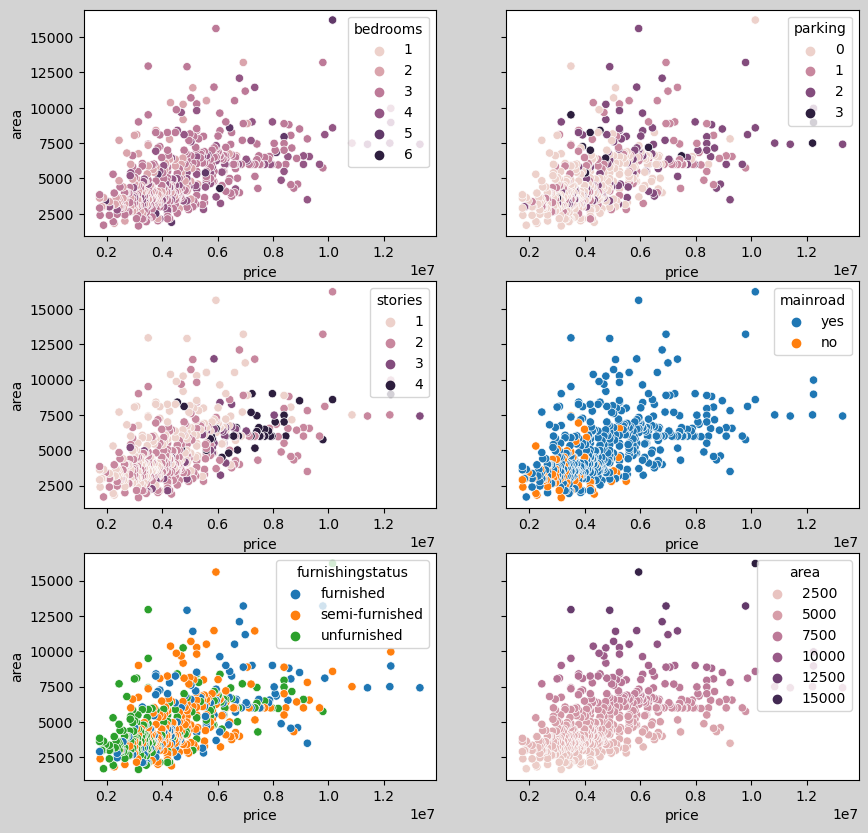

In [6]:
fig,axes = plt.subplots(3,2,sharey=True,figsize = (10,10),facecolor='lightgray')
sns.scatterplot(ax=axes[0,0],x = df.price,y = df.area, hue=df.bedrooms);
sns.scatterplot(ax=axes[0,1],x= df.price,y = df.area, hue=df.parking);
sns.scatterplot(ax=axes[1,0],x= df.price,y = df.area, hue=df.stories);
sns.scatterplot(ax=axes[1,1],x = df.price,y= df.area,hue=df.mainroad);
sns.scatterplot(ax=axes[2,0],x = df.price,y= df.area,hue=df.furnishingstatus);
sns.scatterplot(ax=axes[2,1],x = df.price,y= df.area,hue=df.area);

# Housing Structure Information

In [7]:
information = df[['bedrooms','bathrooms','stories','parking','mainroad','furnishingstatus']]
for i in information:
    print(i)
    print(information[i].value_counts())
    print('----------------')

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64
----------------
bathrooms
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64
----------------
stories
2    238
1    227
4     41
3     39
Name: stories, dtype: int64
----------------
parking
0    299
1    126
2    108
3     12
Name: parking, dtype: int64
----------------
mainroad
yes    468
no      77
Name: mainroad, dtype: int64
----------------
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64
----------------


# House Price Based on Amenities 

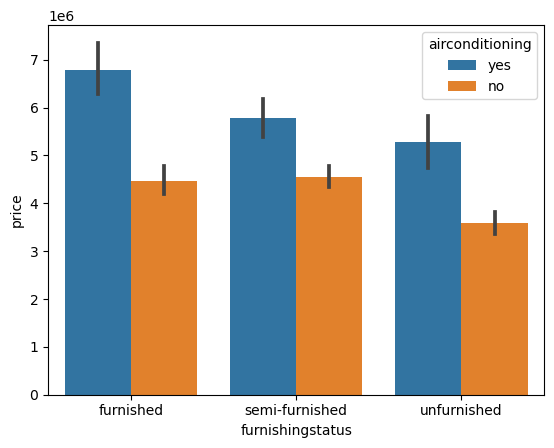

In [8]:
sns.barplot(df.furnishingstatus,df.price,hue = df.airconditioning);

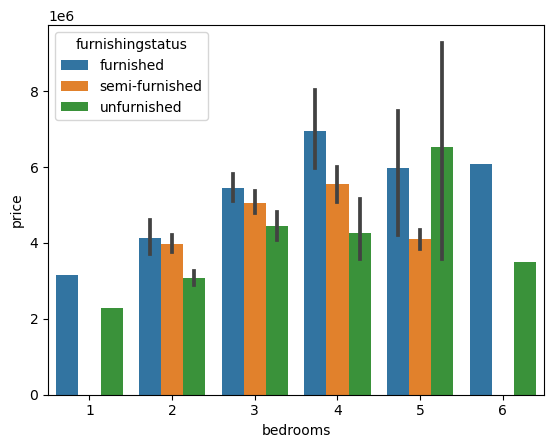

In [9]:
sns.barplot(df.bedrooms,df.price,hue = df.furnishingstatus);

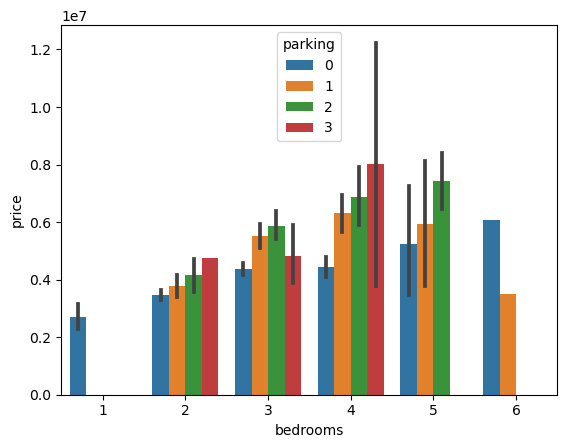

In [10]:
sns.barplot(df.bedrooms,df.price,hue = df.parking);

# Data Exploration 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Observation from above Information

- There are Total 545 data in each feature variables.
- price,area,bedrooms,bathrooms,stories,parking having datatype as integer, where as rest other columns are having datatype as object.

In [12]:
df.describe(percentiles=[0.25,0.50,0.75,1]).T

,count,mean,std,min,25%,50%,75%,100%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0,3.0


In [13]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

- We have total 2 unique values in features mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea.
- furnishingstatus has total 3 unique values.
- ### Note :- To Deal with this categorical columns we can use map function,get_dummies function,OneHotEncoder Technique or SimpleImputer Technique to convert categorical column to integer values.

In [14]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})

In [15]:
furnish = pd.get_dummies(df['furnishingstatus'],drop_first=True)

In [16]:
furnish

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [17]:
data = pd.concat([df,furnish],axis = 1)

In [18]:
data.drop(['furnishingstatus'],axis = 1,inplace=True)

In [19]:
data.drop(['mainroad'],axis = 1,inplace= True)

In [20]:
data.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,0,1,2,0,0,0


In [21]:
data.describe(percentiles=[0.25,0.50,0.75]).T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
guestroom,545.0,1.779817e-01,3.828487e-01,0.0,0.0,0.0,0.0,1.0
basement,545.0,3.504587e-01,4.775519e-01,0.0,0.0,0.0,1.0,1.0
hotwaterheating,545.0,4.587156e-02,2.093987e-01,0.0,0.0,0.0,0.0,1.0
airconditioning,545.0,3.155963e-01,4.651799e-01,0.0,0.0,0.0,1.0,1.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   guestroom        545 non-null    int64
 6   basement         545 non-null    int64
 7   hotwaterheating  545 non-null    int64
 8   airconditioning  545 non-null    int64
 9   parking          545 non-null    int64
 10  prefarea         545 non-null    int64
 11  semi-furnished   545 non-null    uint8
 12  unfurnished      545 non-null    uint8
dtypes: int64(11), uint8(2)
memory usage: 48.0 KB


## Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

## Standardization of the Dataset

## Model Building Libraries of sklearn

In [23]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

In [24]:
features = data.columns
features

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [25]:
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished']]
y = data['price']

In [26]:
# Splitting the Dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=41)

In [27]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [28]:
#Ridge Regression Model
ridgeReg = Ridge()

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

In [29]:
print(train_score_ridge)
print(test_score_ridge)

0.7019366863770831
0.6089485395166863


In [30]:
#Lasso Regression Model
lasso = Lasso(alpha = 0.01)

lasso.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_lasso = lasso.score(X_train, y_train)
test_score_lasso = lasso.score(X_test, y_test)

In [31]:
print(train_score_lasso)
print(test_score_lasso)

0.7019381936687226
0.6089009719621377
